<a href="https://colab.research.google.com/github/anasnafis77/Deteksi-Glaukoma/blob/main/Glaucoma_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [85]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt


In [2]:
path = '/content/gdrive/My Drive/Drive Tugas Akhir/Kode/'

In [3]:
df = pd.read_json(path+'dataframe_new.json')

In [107]:
def CDR_calc(OD_mask, OC_mask):
  c_OD,_ = cv2.findContours(OD_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  p_OD = cv2.approxPolyDP(c_OD[0], 3, True)
  c_OC,_ = cv2.findContours(OC_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  p_OC = cv2.approxPolyDP(c_OC[0], 3, True)
  x_OD, y_OD, hor_OD, ver_OD = cv2.boundingRect(p_OD)
  x_OC, y_OC, hor_OC, ver_OC = cv2.boundingRect(p_OC)
  
  #x1_OD = x_OD + hor_OD
  #y1_OD = y_OD + ver_OD
  #img_tes = OD_mask.copy()
  #cv2.rectangle(img_tes,(x_OD, y_OD),(x1_OD, y1_OD), 255, 2)
  #cv2.drawContours(img_tes, c_OD, 0, 128, 3)
  #cv2.circle(img_tes, (x_OD, y_OD), 10, 128, cv2.FILLED)
  #cv2.circle(img_tes, (x1_OD, y1_OD), 10, 128, cv2.FILLED)
  #plt.figure(figsize=(10,10))
  #plt.imshow(img_tes, cmap='gray')

  VCDR = ver_OC/ver_OD # vertical CDR
  HCDR = hor_OC/ hor_OD # Horizontal CDR
  ACDR = np.sum(OC_mask == 255)/ np.sum(OD_mask == 255) # Area CDR
  #print('VCDR : {:.3f}'.format(VCDR))
  #print('HCDR : {:.3f}'.format(HCDR))
  #print('ACDR : {:.3f}'.format(ACDR))

  return VCDR, HCDR, ACDR

def ISNT_calc(OD_mask, OC_mask):
  NRR = OD_mask - OC_mask # Neuro Retinal Rim
  return NRR

In [108]:
VCDR_gt = [] # vertical CDR perhitungan mandiri pada mask gt
HCDR_gt = [] # horizontal CDR perhitungan mandiri pada mask gt
ACDR_gt = [] # Areal CDR perhitungan mandiri pada mask gt
dr_gl = []
dr_n = []
re_gl = []
re_n = []
for i in tqdm(range(len(df))):
  OD_mask = cv2.imread(df['path_OD_png'][i], 0)
  OC_mask = cv2.imread(df['path_OC_png'][i], 0)
  VCDR, HCDR, ACDR = CDR_calc(OD_mask, OC_mask)
  if 
  VCDR_gt.append(VCDR)
  HCDR_gt.append(HCDR)
  ACDR_gt.append(ACDR)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [97]:
len(list(range(len(df))))

450

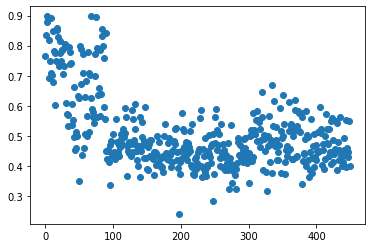

In [103]:
plt.scatter(list(range(len(df))), np.array(CDR_gtc)[:, 0])
plt.show()